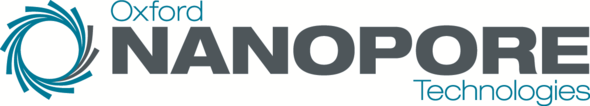

# Installation of nCoV-docker image

In [2]:
from megrim.environment import tutorial_branding
tutorial_branding("nCoV-2019", "Installation of nCoV-docker image")


### Preamble

The ARTIC network has provided bioinformatics resources and best-practise documents for the bioinformatics analysis of *nCoV-2019*-like viral sequences. These resources are publicly available but installation requires experience with approaches to bioinformatics software that includes:

1. Cloning source repositories from github.com
1. Installing CONDA environments
1. Activating CONDA environments and running multi-step workflows

To support customer efforts in the characterisation and sequencing of nCoV-2019 viral genomes the ARTIC-Rampart software has been packaged for distribution and installation on the GridION device (this docker container may work on other systems but this has not been tested).

The software has been packaged as a **`docker`** container - the software bundled in the container includes the packages required by the ARTIC Rampart software for the real-time characterisation of potential nCoV-2019 -like DNA sequences.  


### Prepare the GridION to run the Docker services

Docker is publicly available software that enables the creation and sharing of containerised software packages and workflows. There are already Nanopore packages that orchestrate the installation of Docker and ancillary software.

To install Docker we will use the terminal on the GridION as the standard **`grid`** user. Please execute the commands below to install Docker. The epi2me-labs-installer will ask for an *epi2me token* - please **ignore** this step and press ENTER a couple of times to drop out of the process - *Docker will have been installed*.

These steps require an internet connection and the computer needs access to the core Ubuntu software installation repository, Github and Docker.com. There is no requirement for access to Amazon AWS.

```
curl -o epi2me-labs-installer \
    https://raw.githubusercontent.com/nanoporetech/epi2me-labs-installer/master/epi2me-labs-installer
chmod +x epi2me-labs-installer
sudo ./epi2me-labs-installer
```

We need to assign the **`grid`** user the ability to control Docker processes.

```
sudo usermod -a -G docker grid
```

The GridION device is now ready for the installation of the **`rampart`** container. This *Docker* installation does not need to be performed again.

### Installation of the Rampart software container

Copy the **`artic-ncov-docker-0.1.tar`** file to the GridION device - (this file is available from BOX). In the console as the normal **`grid`** user please validate the **`md5sum`** checksum prior to installation

```
md5sum rampart_gridion_0.1.1.tar
MD5 (rampart_gridion_0.1.1.tar) = fb17b0b8ebee196226817a4171091389

docker load --input rampart_gridion_0.1.1.tar
```

The installation will take a couple of minutes. This method needs to be repeated with each release of the Rampart docker container - updates will be provided as additional reference genomes and context become available - and as new accompanying tools are released.

### Running the Rampart software

Please changed to a suitable directory on the **`/data`** drive - the workflow will work best when you are in a sequencing folder and a sub-directory of **`pass`** files is available within the folder. The only requirement for the analysis is that the Docker container is called from a folder that contains this **`pass`** sub-directory that must contain the FASTQ files of interest.

```
docker run -it -e LOCAL_USER_ID=`id -u $USER` --mount type=bind,source="$(pwd)",target=/data -p 3000:3000 -p 3001:3001 rampart-gridion:0.1.1
```

This command looks a little bit scary - I'll try to explain what each of the steps mean

- **`docker run -it`** - is a request to run a docker container interactively and with a TTY like terminal connection. This means that we can see what the docker container is doing and can kill the process with e.g. a **CTRL-C** command
- **`` -e LOCAL_USER_ID=`id -u $USER` ``** (please note the back-ticks in the command) sets an **environment** variable in the Docker container. This corresponds to the current user's UID and allows for the container to write results to the current folder without **`chmod`** changes.
- **` --mount type=bind,source="$(pwd)",target=/data `** is the specification for us to access the current working directory within the Docker container. This means that Rampart inside the container can read and write files - important.
- **` -p 3000:3000 -p 3001:3001 `** are the instructions to provide linkage between computer ports 3000 and 3001 between the host and the container. This allows for us to view the web-applications running inside the container.
- **`rampart-gridion:0.1.1`** is the name of the container that we are calling. This document should be current with the latest version.

The Docker container will load and will automatically start analysing the DNA sequences within the **`pass`** folder. The results from the analysis will be written to a new directory called **`annotations`**.

The **`Rampart`** software starts a webserver to present the dynamically updated results. As soon as the software has started please browser to

   [http://localhost:3000](http://localhost:3000) - this software is available through other addresses on the computer e.g. 127.0.0.1:3000.